# Stage Boundary Visualization

In [21]:
import constants as c
import pandas as pd
import harry_plotter

from utils import io

Retrieve labels

In [22]:
labels_path = io.resolve_path(c.DATA_DIR) / c.LABEL_FILE
df_labels = pd.read_csv(labels_path,
                        index_col=c.ORBIT_COL,
                        parse_dates=c.EVENT_COLS)

Load an exemplary orbit

In [23]:
ORBIT_ID = 146

In [24]:
orbit_path = io.resolve_path(c.DATA_DIR) / c.TRAIN_SUBDIR / c.ORBIT_FILE(ORBIT_ID)
df_orbit = pd.read_csv(orbit_path,
                       index_col=c.DATE_COL,
                       parse_dates=True)

Show stage boundary timestamps

In [25]:
df_labels.loc[ORBIT_ID]

SK outer in    2011-06-04 19:57:00
SK inner in    2011-06-04 19:57:24
MP outer in    2011-06-04 22:37:41
MP inner in    2011-06-04 22:47:05
MP inner out   2011-06-05 00:24:46
MP outer out   2011-06-05 00:28:29
SK inner out   2011-06-05 00:41:32
SK outer out   2011-06-05 00:43:05
Name: 146, dtype: datetime64[ns]

Plot magnetic flux density with stage boundaries

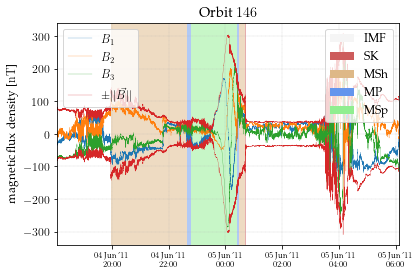

In [26]:
figpath = str(io.resolve_path(c.TEMP_DIR) / c.MESSENGER(ORBIT_ID)) + "_events.pdf"
harry_plotter.plot_orbit(
    df_orbit.index,
    (df_orbit["BX_MSO"],
    df_orbit["BY_MSO"],
    df_orbit["BZ_MSO"]),
    symbol="B",
    labels=df_orbit[c.LABEL_COL],
    title=f"Orbit ${ORBIT_ID}$",
    ylabel="magnetic flux density [\si{nT}]",
    outfile=figpath
)